In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("Iris.csv")
print("First 5 rows:\n", df.head())

# Drop ID column if it exists
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Class distribution
print("\nClass distribution:\n", df['Species'].value_counts())




First 5 rows:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Missing values:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Class distribution:
 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


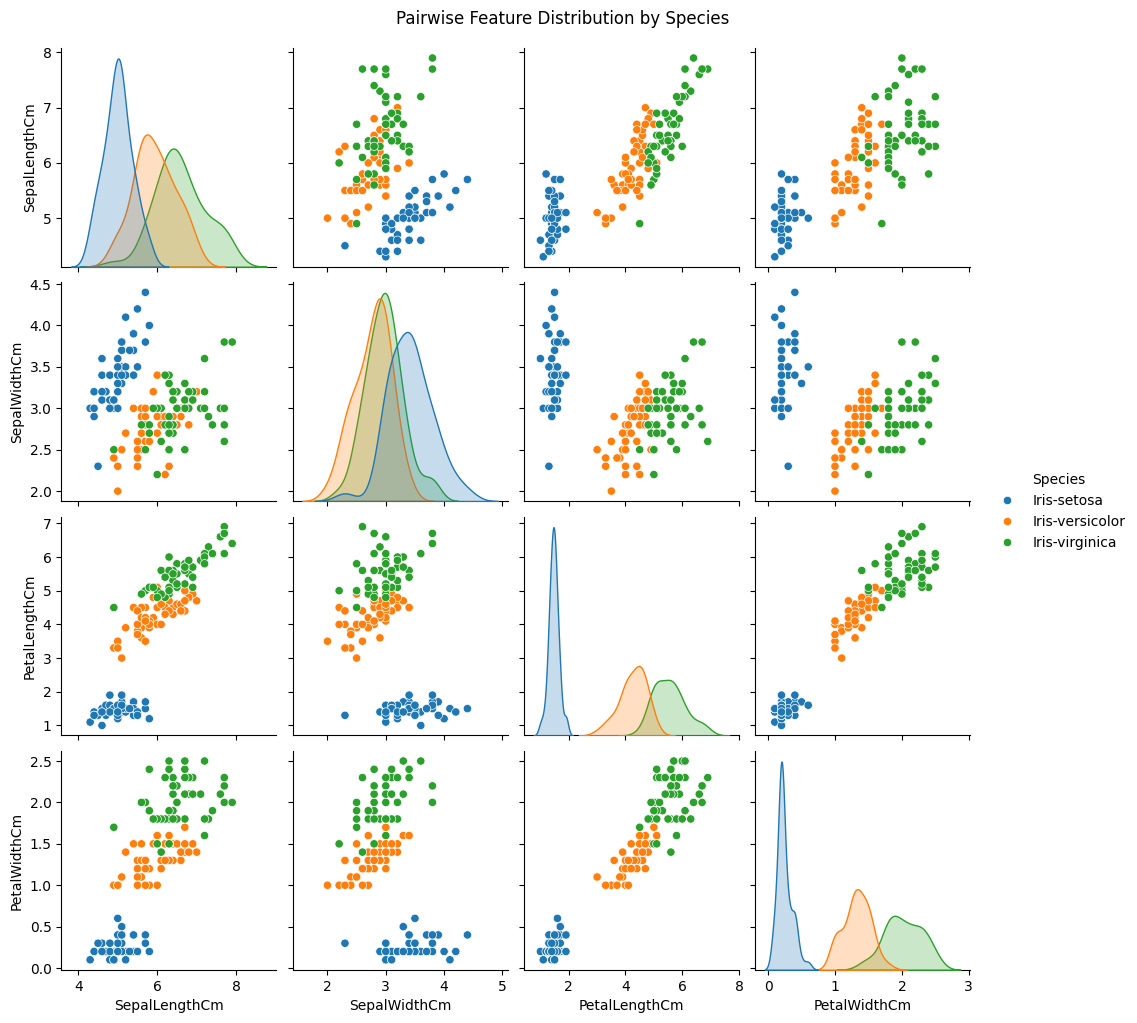

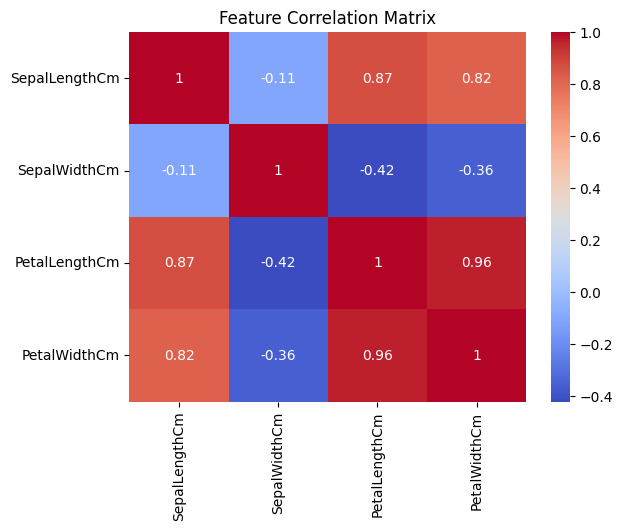

In [10]:
# Pairplot for visualization
sns.pairplot(df, hue='Species')
plt.suptitle("Pairwise Feature Distribution by Species", y=1.02)
plt.show()

# Correlation heatmap
sns.heatmap(df.drop('Species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()



In [12]:
# Prepare features and target
X = df.drop('Species', axis=1)
y = df['Species']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [13]:

# classifiers
models = {
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(kernel='linear'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}



In [14]:
# Train and evaluate each model
for name, model in models.items():
    print(f"\n {name} Classifier")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


 Random Forest Classifier
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


 Support Vector Machine Classifier
Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.9